In [15]:
import contractions
import numpy as np
import pandas as pd
import spacy
import time

In [4]:
# Load spacy model and dataset
file_dir = "C:/Users/mnelo/Documents/masters/ANLP/AT3/Reviews.csv"
data = pd.read_csv(file_dir)
nlp = spacy.load("en_core_web_lg")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(len(data))
print(len(data.loc[data['HelpfulnessDenominator'] != 0]))

568454
298402


In [6]:
# Target Variable - how helpful is a review
data['help'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

# Remove unused data to free up memory
data = data[['ProfileName', 'help', 'Score', 'Text']] 
data = data.loc[data['help'].notna()]
data.head()

,ProfileName,help,Score,Text
0,delmartian,1.0,5,I have bought several of the Vitality canned d...
2,"Natalia Corres ""Natalia Corres""",1.0,4,This is a confection that has been around a fe...
3,Karl,1.0,2,If you are looking for the secret ingredient i...
8,R. James,1.0,5,Right now I'm mostly just sprouting this so my...
10,Canadian Fan,1.0,5,I don't know if it's the cactus or the tequila...


In [17]:
# Test run on small dataset
train_set = data.iloc[:1000]
train_set.head()

,ProfileName,help,Score,Text
0,delmartian,1.0,5,I have bought several of the Vitality canned d...
2,"Natalia Corres ""Natalia Corres""",1.0,4,This is a confection that has been around a fe...
3,Karl,1.0,2,If you are looking for the secret ingredient i...
8,R. James,1.0,5,Right now I'm mostly just sprouting this so my...
10,Canadian Fan,1.0,5,I don't know if it's the cactus or the tequila...


In [9]:
import category_encoders as ce

In [13]:
# Leave one out encoding for ProfileName (too many users for one-hot encoding)
encoder = ce.TargetEncoder() 
encoder.fit(train_set['ProfileName'], train_set['help'])
X_transform = encoder.transform(train_set['ProfileName'])

In [14]:
X_transform

,ProfileName
0,0.789365
2,0.789365
3,0.789365
8,0.789365
10,0.792208
...,...
2003,0.789365
2004,0.763343
2005,0.749332
2006,0.789365


In [18]:
# Prep Text
def text_processing(df):
    # Replace contractions 
    df['Text'] = df['Text'].apply(contractions.fix)
    
    # Remove HTML tags
    df['Text'] = df['Text'].str.replace(r'<[^>]+>', '', regex=True)
    
    return df

train_set = text_processing(train_set)
train_set.head()

C:\Users\mnelo\anaconda3\envs\py_cpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mnelo\anaconda3\envs\py_cpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ProfileName,help,Score,Text
0,delmartian,1.0,5,I have bought several of the Vitality canned d...
2,"Natalia Corres ""Natalia Corres""",1.0,4,This is a confection that has been around a fe...
3,Karl,1.0,2,If you are looking for the secret ingredient i...
8,R. James,1.0,5,Right now I am mostly just sprouting this so m...
10,Canadian Fan,1.0,5,I do not know if it is the cactus or the tequi...


In [19]:
# NLP
train_set['nlp'] = train_set['Text'].apply(nlp)
train_set.head()

C:\Users\mnelo\anaconda3\envs\py_cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ProfileName,help,Score,Text,nlp
0,delmartian,1.0,5,I have bought several of the Vitality canned d...,"(I, have, bought, several, of, the, Vitality, ..."
2,"Natalia Corres ""Natalia Corres""",1.0,4,This is a confection that has been around a fe...,"(This, is, a, confection, that, has, been, aro..."
3,Karl,1.0,2,If you are looking for the secret ingredient i...,"(If, you, are, looking, for, the, secret, ingr..."
8,R. James,1.0,5,Right now I am mostly just sprouting this so m...,"(Right, now, I, am, mostly, just, sprouting, t..."
10,Canadian Fan,1.0,5,I do not know if it is the cactus or the tequi...,"(I, do, not, know, if, it, is, the, cactus, or..."


In [35]:
# Vectorise
vectors = train_set['nlp'].apply(lambda x: x.vector)
vec_df = vectors.apply(pd.Series)
vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.960271,-0.120265,-2.879256,-0.082173,3.985214,-0.007168,0.840115,4.067488,-1.544959,-0.112772,...,0.412735,-0.754119,1.137732,-0.830704,-1.200805,0.137115,0.420211,0.009785,-3.994283,1.006849
2,-1.381840,0.312071,-1.549233,0.217776,3.624397,-0.022144,0.381675,3.450651,-0.464539,-0.266927,...,0.720541,-0.706097,1.397890,-0.362466,-1.346476,1.826767,1.066700,-0.451453,-2.593028,1.176262
3,-1.645617,-0.451959,-1.153215,-0.691787,1.576520,-0.130108,0.385935,3.369108,-1.292638,1.685151,...,1.904504,-1.165218,1.273175,-0.834926,-1.845160,1.170541,0.629345,-0.258053,-2.405222,1.208446
8,0.630604,1.305619,-3.838381,-2.013389,0.522711,0.654413,-0.300469,3.893047,-2.593688,2.215537,...,1.812546,-0.689660,1.843571,-2.465952,-2.027133,0.194390,1.037831,0.678864,-5.334555,1.792610
10,-1.183520,1.040457,-3.194754,-0.001575,2.797862,0.478775,0.170642,3.777203,-1.202753,0.693281,...,0.847763,-0.353454,1.514972,-1.011978,-2.112856,0.530037,0.799320,0.216931,-2.950250,0.943791


In [37]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Embedding, LSTM, add
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vec_df, train_set['help'], test_size=0.2, random_state=99)

In [64]:
X_train.shape

(800, 300)

In [86]:
# LSTM

# Parameters
optimizer = Adam(0.001)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=2)

# Architecture
model = Sequential()
# model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length)) 
# Note - input data uses embeddings from spacy, hence skipping the embedding layer within the NN
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [87]:
# Fit Model
lstm = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=120, batch_size=64,
                 callbacks=[early_stop],
                 use_multiprocessing=True,
                 workers=6)

Epoch 1/120
13/13 [==============================] - 66s 5s/step - loss: 0.3621 - accuracy: 0.3338 - val_loss: 0.2269 - val_accuracy: 0.2500
Epoch 2/120
13/13 [==============================] - 80s 6s/step - loss: 0.2096 - accuracy: 0.4137 - val_loss: 0.1429 - val_accuracy: 0.6400
Epoch 3/120
13/13 [==============================] - 87s 7s/step - loss: 0.1701 - accuracy: 0.5325 - val_loss: 0.1502 - val_accuracy: 0.6350
Epoch 4/120
13/13 [==============================] - 142s 11s/step - loss: 0.1647 - accuracy: 0.5500 - val_loss: 0.1406 - val_accuracy: 0.6400
Epoch 5/120
13/13 [==============================] - 98s 8s/step - loss: 0.1640 - accuracy: 0.5550 - val_loss: 0.1400 - val_accuracy: 0.6400
Epoch 6/120
13/13 [==============================] - 98s 8s/step - loss: 0.1680 - accuracy: 0.5550 - val_loss: 0.1393 - val_accuracy: 0.6400
Epoch 7/120
13/13 [==============================] - 89s 7s/step - loss: 0.1512 - accuracy: 0.5800 - val_loss: 0.1343 - val_accuracy: 0.6400
Epoch 8/120

Epoch 59/120
13/13 [==============================] - 112s 9s/step - loss: 0.1388 - accuracy: 0.5875 - val_loss: 0.1297 - val_accuracy: 0.6400
Epoch 60/120
13/13 [==============================] - 88s 7s/step - loss: 0.1407 - accuracy: 0.5913 - val_loss: 0.1275 - val_accuracy: 0.6400
Epoch 61/120
13/13 [==============================] - 88s 7s/step - loss: 0.1418 - accuracy: 0.5888 - val_loss: 0.1291 - val_accuracy: 0.6400
Epoch 62/120
13/13 [==============================] - 109s 8s/step - loss: 0.1367 - accuracy: 0.5900 - val_loss: 0.1282 - val_accuracy: 0.6400
Epoch 63/120
13/13 [==============================] - 101s 8s/step - loss: 0.1326 - accuracy: 0.5888 - val_loss: 0.1294 - val_accuracy: 0.6400
Epoch 64/120
13/13 [==============================] - 98s 8s/step - loss: 0.1382 - accuracy: 0.5900 - val_loss: 0.1304 - val_accuracy: 0.6400
Epoch 65/120
13/13 [==============================] - 88s 7s/step - loss: 0.1369 - accuracy: 0.5888 - val_loss: 0.1324 - val_accuracy: 0.6400


In [88]:
# Plot Learning Curves
import matplotlib.pyplot as plt

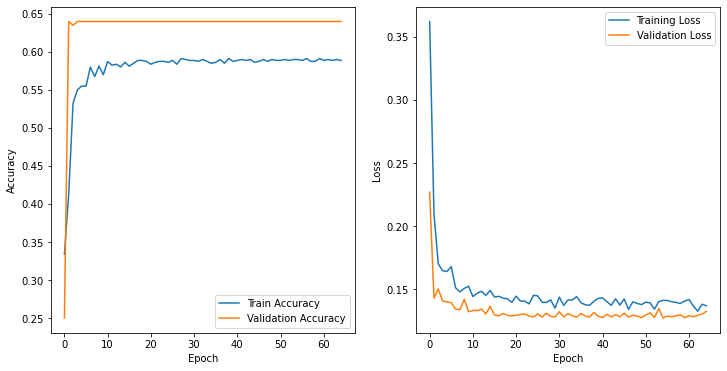

In [90]:
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm.history['accuracy'])
plt.plot(lstm.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

# Loss
plt.subplot(1, 2, 2)
plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
    
plt.show()